# `map` vs `apply`

Do you know the difference between the **`map`** and **`apply`** Series methods?

In [1]:
from IPython.display import IFrame

In [7]:
IFrame('http://etc.ch/RjoN', 400, 300)

In [10]:
IFrame('https://directpoll.com/r?XDbzPBd3ixYqg8VzFnGsNyv3rYRtjyM1R0g6HvOxV', 300, 300)

# Primary usage of `map` method
As the name implies, **`map`** can literally map one value to another in a Series. Pass it a dictionary (or another Series). Let's see an example:

In [5]:
import pandas as pd
import numpy as np

In [99]:
s = pd.Series(np.random.randint(1, 7, 10))
s

0    3
1    5
2    6
3    4
4    5
5    2
6    6
7    3
8    1
9    3
dtype: int64

Create mapping dictionary

In [100]:
d = {1:'odd', 2:'even', 3:'odd', 4:'even', 5:'odd', 6:'even'}

In [101]:
s.map(d)

0     odd
1     odd
2    even
3    even
4     odd
5    even
6    even
7     odd
8     odd
9     odd
dtype: object

Works the same if you use a Series

In [104]:
s1 = pd.Series(d)
s1

1     odd
2    even
3     odd
4    even
5     odd
6    even
dtype: object

In [105]:
s.map(s1)

0     odd
1     odd
2    even
3    even
4     odd
5    even
6    even
7     odd
8     odd
9     odd
dtype: object

#### `map` example with more data
Let's map the values of 1 million integers ranging from 1 to 100 to 'even/odd' strings

In [106]:
n = 1000000 # 1 million
s = pd.Series(np.random.randint(1, 101, n))
s.head()

0    21
1    14
2    74
3    75
4    95
dtype: int64

Create the mapping

In [107]:
d = {i: 'odd' if i % 2 else 'even' for i in range(1, 101)}
print(d)

{1: 'odd', 2: 'even', 3: 'odd', 4: 'even', 5: 'odd', 6: 'even', 7: 'odd', 8: 'even', 9: 'odd', 10: 'even', 11: 'odd', 12: 'even', 13: 'odd', 14: 'even', 15: 'odd', 16: 'even', 17: 'odd', 18: 'even', 19: 'odd', 20: 'even', 21: 'odd', 22: 'even', 23: 'odd', 24: 'even', 25: 'odd', 26: 'even', 27: 'odd', 28: 'even', 29: 'odd', 30: 'even', 31: 'odd', 32: 'even', 33: 'odd', 34: 'even', 35: 'odd', 36: 'even', 37: 'odd', 38: 'even', 39: 'odd', 40: 'even', 41: 'odd', 42: 'even', 43: 'odd', 44: 'even', 45: 'odd', 46: 'even', 47: 'odd', 48: 'even', 49: 'odd', 50: 'even', 51: 'odd', 52: 'even', 53: 'odd', 54: 'even', 55: 'odd', 56: 'even', 57: 'odd', 58: 'even', 59: 'odd', 60: 'even', 61: 'odd', 62: 'even', 63: 'odd', 64: 'even', 65: 'odd', 66: 'even', 67: 'odd', 68: 'even', 69: 'odd', 70: 'even', 71: 'odd', 72: 'even', 73: 'odd', 74: 'even', 75: 'odd', 76: 'even', 77: 'odd', 78: 'even', 79: 'odd', 80: 'even', 81: 'odd', 82: 'even', 83: 'odd', 84: 'even', 85: 'odd', 86: 'even', 87: 'odd', 88: 'eve

In [108]:
s.map(d).head(10)

0     odd
1    even
2    even
3     odd
4     odd
5    even
6     odd
7     odd
8     odd
9    even
dtype: object

### Exercise 1
<span style="color:green; font-size:16px">Can you use the **`apply`** method to do the same thing? Time the difference between the **`apply`** and **`map`**.</span>

In [ ]:
# your code here

### `map` and `apply` can both take functions
Unfortunately both **`map`** and **`apply`** can accept a function that gets implicitly passed each value in the Series. The result of each operation is the exact same.

In [80]:
a = s.apply(lambda x: 'odd' if x % 2 else 'even')
b = s.map(lambda x: 'odd' if x % 2 else 'even')

a.equals(b)

True

This dual functionality of **`map`** confuses users. It can accept a dictionary but it can also accept a function.

### Suggestion: only use `map` for literal mapping
It makes more sense to me that the **`map`** method only be used for one purpose and this is to map each value in a Series from one value to another with a dictionary or a Series.

### Use `apply` only for functions
**`apply`** must take a function and has more options than **`map`** when taking a function so it should be used when you want to apply a function to each value in a Series. There is no difference in speed between the two.

### Exercise 2
<span style="color:green; font-size:16px">Use the **`map`** method with a two-item dictionary to convert the Series of integers to 'even/odd' strings. You will need to perform an operation on the Series first. Is this faster or slower than the results in exercise 1?</span>

In [109]:
# run this code first
n = 1000000 # 1 million
s = pd.Series(np.random.randint(1, 101, n))

In [83]:
# your code here

### Exercise 3
<span style="color:green; font-size:16px">Write a for-loop to convert each value in the  Series to 'even/odd' strings. Time the operation.</span>

In [84]:
# your code here

# Vectorized if-then-else with NumPy `where`
The NumPy **`where`** function provides us with a vectorized if-then-else that is very fast. Let's convert the Series again to 'even/odd' strings.

In [156]:
s = pd.Series(np.random.randint(1, 101, n))

In [157]:
np.where(s % 2, 'odd', 'even')

array(['even', 'odd', 'odd', ..., 'even', 'odd', 'odd'],
      dtype='<U4')

In [158]:
%timeit np.where(s % 2, 'odd', 'even')

21 ms ± 1.34 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Exercise 4
<span style="color:green; font-size:16px">Convert the values from 1-33 to 'low', 34-67 to 'medium' and the rest 'high'.</span>

In [ ]:
# your code here

# Do we really need `apply`?
As we saw from this last example, we could eliminate the need for the **`apply`** method. Most examples of code that use **`apply`** do not actually need it.

### `apply` doesn't really do anything
By itself, the **`apply`** method doesn't really do anything. 
* For Series, it iterates over every single value and passes that value to a function that you must pass to **`apply`**. 
* For a DataFrame, it iterates over each column or row as a Series and calls your passed function on that Series

Let's see a simple example of **`apply`** used to multiply each value of a Series by 2:

In [174]:
s = pd.Series(np.random.randint(1, 101, n))

In [176]:
s.apply(lambda x: x * 2).head()

0     30
1     54
2    174
3    126
4     68
dtype: int64

In [177]:
(s * 2).head()

0     30
1     54
2    174
3    126
4     68
dtype: int64

In [178]:
%timeit s.apply(lambda x: x * 2)

310 ms ± 11 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [179]:
%timeit s * 2

1.85 ms ± 25.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Use vectorized solution whenever possible
As you can see, the solution with **`apply`** was more than 2 orders of magnitude slower than the vectorized solution. A for-loop can be faster than **`apply`**.

In [181]:
%timeit pd.Series([v * 2 for v in s])

213 ms ± 9.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


I like to call **`apply`** the **method of last resort**. There is almost rarely a reason to use it over other methods. Pandas and NumPy both provide a tremendous amount of functionality that cover nearly everything you need to do. 

Always use pandas and NumPy methods first before anything else.

### Use-cases for `apply` on a Series
When there is no vectorized implementation in pandas, numpy or other scientific library, then you can use **`apply`**.

A simple example (that's not too practical) is finding the underlying data type of each value in a Series.

In [206]:
s = pd.Series(['a', {'TX':'Texas'}, 99, (0, 5)])
s

0                  a
1    {'TX': 'Texas'}
2                 99
3             (0, 5)
dtype: object

In [207]:
s.apply(type)

0      <class 'str'>
1     <class 'dict'>
2      <class 'int'>
3    <class 'tuple'>
dtype: object

A more practical example might be from a library that doesn't work directly with arrays, like finding the edit distance between two strings from the NLTK library.

In [8]:
from nltk.metrics import edit_distance

In [9]:
edit_distance('Kaitlyn', 'Kaitlin')

1

In [6]:
s = pd.Series(['Kaitlyn', 'Katelyn', 'Kaitlin', 'Katelynn', 'Katlyn',
               'Kaitlynn', 'Katelin', 'Katlynn', 'Kaitlin', 'Caitlyn', 'Caitlynn'])
s

0      Kaitlyn
1      Katelyn
2      Kaitlin
3     Katelynn
4       Katlyn
5     Kaitlynn
6      Katelin
7      Katlynn
8      Kaitlin
9      Caitlyn
10    Caitlynn
dtype: object

Using **`apply`** here is correct

In [7]:
s.apply(lambda x: edit_distance(x, 'Kaitlyn'))

0     0
1     2
2     1
3     3
4     1
5     1
6     3
7     2
8     1
9     1
10    2
dtype: int64

### Using `apply` on a DataFrame
By default **`apply`** will call the passed function on each individual column on a DataFrame. The column will be passed to the function as a Series.

In [190]:
df = pd.DataFrame(np.random.rand(100, 5), columns=['a', 'b', 'c', 'd', 'e'])
df.head()

,a,b,c,d,e
0,0.117489,0.744550,0.190812,0.876725,0.403879
1,0.939387,0.190391,0.846965,0.831695,0.543452
2,0.136038,0.629745,0.029833,0.494858,0.722710
3,0.701555,0.125639,0.831673,0.228127,0.620952
4,0.723207,0.543367,0.678195,0.007201,0.620797


In [189]:
df.apply(lambda s: s.max())

a    0.990704
b    0.994806
c    0.990948
d    0.997045
e    0.998332
dtype: float64

We can change the direction of the operation by seting the **`axis`** parameter to **`1`** or **`columns`**

In [191]:
df.apply(lambda s: s.max(), axis='columns').head(10)

0    0.876725
1    0.939387
2    0.722710
3    0.831673
4    0.723207
5    0.657085
6    0.445159
7    0.778422
8    0.701948
9    0.979617
dtype: float64

#### Never actually perform these operations when a DataFrame method exists
Let's fix these two methods and time their differences

In [192]:
df.max()

a    0.993916
b    0.984107
c    0.995378
d    0.986724
e    0.991213
dtype: float64

In [195]:
df.max(axis='columns').head(10)

0    0.876725
1    0.939387
2    0.722710
3    0.831673
4    0.723207
5    0.657085
6    0.445159
7    0.778422
8    0.701948
9    0.979617
dtype: float64

In [196]:
%timeit df.apply(lambda s: s.max())

590 µs ± 16.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [197]:
%timeit df.max()

113 µs ± 3.62 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [198]:
%timeit df.apply(lambda s: s.max(), axis='columns')

7.18 ms ± 402 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [200]:
%timeit df.max(axis='columns')

106 µs ± 1.81 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


5x and 70x faster and much more readable code

### Infected by the documentation
Unfortunately, pandas official documentation is littered with examples that don't need **`apply`**. Can you fix the following 2 misuses of **`apply`** [found here](http://pandas.pydata.org/pandas-docs/stable/10min.html#apply).



### Exercise 1
<span style="color:green; font-size:16px">Make the following idiomatic</span>

In [202]:
df.apply(np.cumsum).head()

,a,b,c,d,e
0,0.117489,0.744550,0.190812,0.876725,0.403879
1,1.056876,0.934941,1.037777,1.708420,0.947331
2,1.192914,1.564686,1.067610,2.203278,1.670041
3,1.894469,1.690325,1.899283,2.431404,2.290992
4,2.617676,2.233692,2.577478,2.438606,2.911790


In [ ]:
# your code here

### Exercise 2
<span style="color:green; font-size:16px">Make the following idiomatic</span>

In [203]:
df.apply(lambda x: x.max() - x.min())

a    0.987587
b    0.980641
c    0.965545
d    0.979522
e    0.977595
dtype: float64

In [204]:
# your code here

### `apply` with `axis=1` is the slowest operation you can do in pandas
If you call **`apply`** with **`axis=1`** or identically with **`axis='columns'`** on a DataFrame, pandas will iterate row by row to complete your operation. Since there are almost always more rows than columns, this will be extremely slow.

### Exercise 3
<span style="color:green; font-size:16px">Add a column named **`distance`** to the following DataFrame that computes the euclidean distance between points **`(x1, y1)`** and **`(x2, y2)`**. Calculate it once with **`apply`** and again idiomatically using vectorized operations. Time the difference between them.</span>

In [33]:
# run this first
df = pd.DataFrame(np.random.randint(0, 20, (100000, 4)), 
                  columns=['x1', 'y1', 'x2', 'y2'])
df.head()

,x1,y1,x2,y2
0,8,6,2,6
1,18,19,9,13
2,13,8,13,17
3,1,8,9,5
4,19,3,18,14


In [ ]:
# your code here

### Use-cases for apply on a DataFrame

DataFrames and Series have nearly all of the their methods in common. For methods that only exist for Series, you might need to use **`apply`**.

In [40]:
weather = pd.DataFrame({'Houston': ['rainy', 'sunny', 'sunny', 'cloudy', 'rainy', 'sunny'],
                        'New York':['sunny', 'sunny', 'snowy', 'snowy', 'rainy', 'cloudy'],
                        'Seattle':['sunny', 'cloudy', 'cloudy', 'cloudy', 'cloudy', 'rainy'],
                        'Las Vegas':['sunny', 'sunny', 'sunny', 'sunny', 'sunny', 'sunny']})
weather

,Houston,Las Vegas,New York,Seattle
0,rainy,sunny,sunny,sunny
1,sunny,sunny,sunny,cloudy
2,sunny,sunny,snowy,cloudy
3,cloudy,sunny,snowy,cloudy
4,rainy,sunny,rainy,cloudy
5,sunny,sunny,cloudy,rainy


Counting the frequencies of each column is normally done by the Series **`value_counts`** method. It does not exist for DataFrames, so you can use it here with **`apply`**.

In [49]:
weather.apply(pd.value_counts)

,Houston,Las Vegas,New York,Seattle
cloudy,1.0,NaN,1,4.0
rainy,2.0,NaN,1,1.0
snowy,NaN,NaN,2,NaN
sunny,3.0,6.0,2,1.0


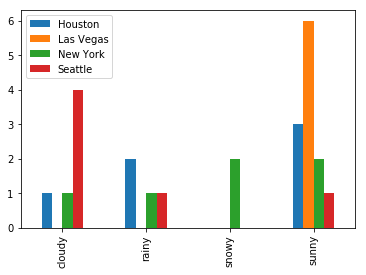

In [51]:
%matplotlib inline
weather.apply(pd.value_counts).plot(kind='bar')

### Using `apply` with the Series accessors `str`, `dt` and `cat`
Pandas Series, depending on their data type, can access additional Series-only methods through **`str`**, **`dt`** and **`cat`** for string, datetime and categorical type columns.

In [54]:
weather.Houston.str.capitalize()

0     Rainy
1     Sunny
2     Sunny
3    Cloudy
4     Rainy
5     Sunny
Name: Houston, dtype: object

Since this method exists only for Series, you can use **`apply`** here to capitalize each column.

In [55]:
weather.apply(lambda x: x.str.capitalize())

,Houston,Las Vegas,New York,Seattle
0,Rainy,Sunny,Sunny,Sunny
1,Sunny,Sunny,Sunny,Cloudy
2,Sunny,Sunny,Snowy,Cloudy
3,Cloudy,Sunny,Snowy,Cloudy
4,Rainy,Sunny,Rainy,Cloudy
5,Sunny,Sunny,Cloudy,Rainy


This is one case where you can use the **`applymap`** method by directly using the string method on each value.

In [58]:
weather.applymap(str.capitalize)

,Houston,Las Vegas,New York,Seattle
0,Rainy,Sunny,Sunny,Sunny
1,Sunny,Sunny,Sunny,Cloudy
2,Sunny,Sunny,Snowy,Cloudy
3,Cloudy,Sunny,Snowy,Cloudy
4,Rainy,Sunny,Rainy,Cloudy
5,Sunny,Sunny,Cloudy,Rainy


In [67]:
employee = pd.read_csv('../data/employee.csv')
employee.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22


Select just the titles and departments 

In [69]:
emp_title_dept = employee[['DEPARTMENT', 'POSITION_TITLE']]
emp_title_dept.head()

,DEPARTMENT,POSITION_TITLE
0,Municipal Courts Department,ASSISTANT DIRECTOR (EX LVL)
1,Library,LIBRARY ASSISTANT
2,Houston Police Department-HPD,POLICE OFFICER
3,Houston Fire Department (HFD),ENGINEER/OPERATOR
4,General Services Department,ELECTRICIAN


Let's find all the departments and titles that contain the word 'police'.

In [72]:
has_police = emp_title_dept.apply(lambda x: x.str.upper().str.contains('POLICE'))
has_police.head()

,DEPARTMENT,POSITION_TITLE
0,False,False
1,False,False
2,True,True
3,False,False
4,False,False


Let's use these boolean values to only select rows that have both values as **`True`**.

In [75]:
emp_title_dept[has_police.all(axis='columns')].head(10)

,DEPARTMENT,POSITION_TITLE
2,Houston Police Department-HPD,POLICE OFFICER
5,Houston Police Department-HPD,SENIOR POLICE OFFICER
14,Houston Police Department-HPD,POLICE SERGEANT
15,Houston Police Department-HPD,SENIOR POLICE OFFICER
16,Houston Police Department-HPD,SENIOR POLICE OFFICER
17,Houston Police Department-HPD,POLICE SERGEANT
19,Houston Police Department-HPD,SENIOR POLICE OFFICER
24,Houston Police Department-HPD,POLICE OFFICER
25,Houston Police Department-HPD,SENIOR POLICE OFFICER
26,Houston Police Department-HPD,SENIOR POLICE OFFICER


### How fast are the `str` accessor methods?
Not any faster than looping...

In [79]:
%timeit employee['POSITION_TITLE'].str.upper()

711 µs ± 37.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [80]:
%timeit employee['POSITION_TITLE'].apply(str.upper)

482 µs ± 18.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [81]:
%timeit pd.Series([x.upper() for x in employee['POSITION_TITLE']])

433 µs ± 7.31 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [83]:
%timeit employee['POSITION_TITLE'].max()

200 µs ± 7.36 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [84]:
%timeit employee['BASE_SALARY'].max()

64.2 µs ± 711 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [85]:
%timeit employee['POSITION_TITLE'].values.max()

51.6 µs ± 2.43 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [86]:
%timeit employee['BASE_SALARY'].values.max()

6.3 µs ± 110 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [87]:
a_list = employee['POSITION_TITLE'].tolist()

In [89]:
%timeit max(a_list)

39.7 µs ± 213 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Exercise 4
<span style="color:green; font-size:16px">The following example is from the documentation. Produce the same result without using apply by creating a function that it accepts a DataFrame and returns a DataFrame</span>

In [90]:
df = pd.DataFrame(np.random.randint(0, 20, (10, 4)), 
                  columns=['x1', 'y1', 'x2', 'y2'])
df.head()

,x1,y1,x2,y2
0,0,14,9,15
1,12,18,17,0
2,0,10,8,6
3,13,3,0,8
4,13,18,7,5


In [91]:
def subtract_and_divide(x, sub, divide=1):
    return (x - sub) / divide

In [92]:
df.apply(subtract_and_divide, args=(5,), divide=3)

,x1,y1,x2,y2
0,-1.666667,3.000000,1.333333,3.333333
1,2.333333,4.333333,4.000000,-1.666667
2,-1.666667,1.666667,1.000000,0.333333
3,2.666667,-0.666667,-1.666667,1.000000
4,2.666667,4.333333,0.666667,0.000000
5,1.000000,-1.333333,-0.333333,4.333333
6,2.000000,3.000000,0.000000,-1.333333
7,-1.666667,-1.333333,0.000000,0.666667
8,-1.000000,2.000000,-0.333333,3.666667
9,2.333333,2.333333,0.000000,-0.666667


In [ ]:
# your code here

### Exercise 5
<span style="color:green; font-size:16px">Make the following idiomatic:</span>

In [130]:
college = pd.read_csv('../data/college.csv', 
                      usecols=lambda x: 'UGDS' in x or x == 'INSTNM', 
                      index_col='INSTNM')
college = college.dropna()
college.shape

(6874, 10)

In [131]:
college.head()

,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,,
Alabama A & M University,4206.0,0.0333,0.9353,0.0055,0.0019,0.0024,0.0019,0.0000,0.0059,0.0138
University of Alabama at Birmingham,11383.0,0.5922,0.2600,0.0283,0.0518,0.0022,0.0007,0.0368,0.0179,0.0100
Amridge University,291.0,0.2990,0.4192,0.0069,0.0034,0.0000,0.0000,0.0000,0.0000,0.2715
University of Alabama in Huntsville,5451.0,0.6988,0.1255,0.0382,0.0376,0.0143,0.0002,0.0172,0.0332,0.0350
Alabama State University,4811.0,0.0158,0.9208,0.0121,0.0019,0.0010,0.0006,0.0098,0.0243,0.0137


In [132]:
def max_race_count(s):
    max_race_pct = s.iloc[1:].max()
    return (max_race_pct * s.loc['UGDS']).astype(int)

In [133]:
college.apply(max_race_count, axis=1).head()

INSTNM
Alabama A & M University               3933
University of Alabama at Birmingham    6741
Amridge University                      121
University of Alabama in Huntsville    3809
Alabama State University               4429
dtype: int64

In [134]:
# your code here

# Tips for debugging `apply`
It is more difficult to debug code that uses **`apply`** when you a custom function. This is because the all the code in your custom function gets executed at once. You aren't stepping through the code one line at a time and checking the output.

### Using the `display` IPython function and print statements to inspect custom function
Let's say you didn't know what **`apply`** with **`axis='columns'`** was implicitly passing to the custom function.

In [135]:
# what the hell is x?
def func(x):
    return 1

In [137]:
college.apply(func, axis=1).head()

INSTNM
Alabama A & M University               1
University of Alabama at Birmingham    1
Amridge University                     1
University of Alabama in Huntsville    1
Alabama State University               1
dtype: int64

Its obvious that you need to know what object **`x`** is in **`func`**. One thing we can do is print out its type. To stop the output we can force an error by calling **`raise`**.

In [140]:
# what the hell is x?
def func(x):
    print(type(x))
    raise
    return 1

college.apply(func, axis=1).head()

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


RuntimeError: ('No active exception to reraise', 'occurred at index Alabama A & M University')

Ok, great. We know that **`x`** is a Series. Why did it get printed twice? It turns out that pandas calls your method twice on the first row/column to determine if it can take a fast path or not. This is a small implementation detail that shouldn't affect you unless your function is making references to variables out of scope.

Let's go one step further and display **`x`** on the screen

In [141]:
from IPython.display import display

In [142]:
# what the hell is x?
def func(x):
    display(x)
    raise
    return 1

college.apply(func, axis=1).head()

UGDS          4206.0000
UGDS_WHITE       0.0333
UGDS_BLACK       0.9353
UGDS_HISP        0.0055
UGDS_ASIAN       0.0019
UGDS_AIAN        0.0024
UGDS_NHPI        0.0019
UGDS_2MOR        0.0000
UGDS_NRA         0.0059
UGDS_UNKN        0.0138
Name: Alabama A & M University, dtype: float64

UGDS          4206.0000
UGDS_WHITE       0.0333
UGDS_BLACK       0.9353
UGDS_HISP        0.0055
UGDS_ASIAN       0.0019
UGDS_AIAN        0.0024
UGDS_NHPI        0.0019
UGDS_2MOR        0.0000
UGDS_NRA         0.0059
UGDS_UNKN        0.0138
Name: Alabama A & M University, dtype: float64

RuntimeError: ('No active exception to reraise', 'occurred at index Alabama A & M University')

### Exercise 1
<span style="color:green; font-size:16px">Use the **`display`** function after each line in a custom function that gets used with **`apply`** and **`axis='columns'`** to find the population of the second highest race per school. Make sure you raise an exception or else you will have to kill your kernel because of the massive output.</span>

In [ ]:
# your code here

### Exercise 2 - Very difficult
<span style="color:green; font-size:16px">Can you do this without using **`apply`**?</span>

In [143]:
# your code here

### Exercise 3
<span style="color:green; font-size:16px">When **`apply`** is called on a Series, what is the data type that gets passed to the function?</span>

In [ ]:
# your code here

# Summary
* **`map`** is a Series method. I suggest using by passing it a dictionary/Series and NOT a function
* Use **`apply`** when you want to apply a function to each value of a Series or each row/column of a DataFrame
* You rarely need **`apply`** - Use only pandas and numpy functions first
* Using `apply` on a DataFrame with **`axis='columns'`** is the slowest operation in pandas
* You can use **`apply`** on a DataFrame when you need to call a method that is available only to Series (like **`value_counts`**)
* Debug apply by printing and using the **`display`** IPython function inside your custom function